#Dataset Load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('carsales.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df=df.drop(['Car_Name'],axis=1)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#EDA

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Selling_Price'}>],
       [<Axes: title={'center': 'Present_Price'}>,
        <Axes: title={'center': 'Kms_Driven'}>],
       [<Axes: title={'center': 'Owner'}>, <Axes: >]], dtype=object)

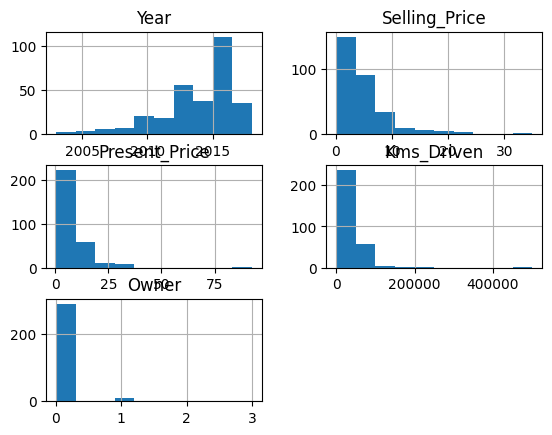

In [4]:
df.hist()

<Axes: >

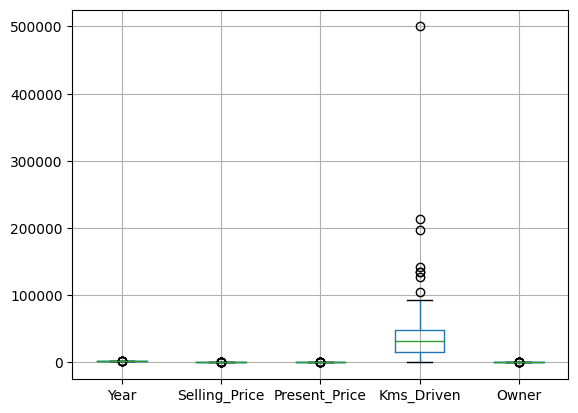

In [5]:
df.boxplot()

In [6]:
#hard to observe what's happenning for the features besides Kms_driven therefore we will check the boxplot of the Standardized dataset

<Axes: >

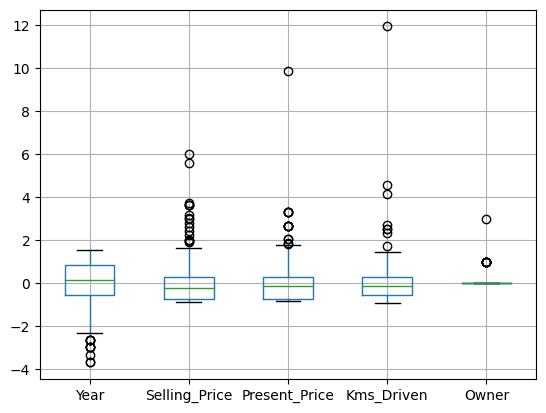

In [7]:
from sklearn.preprocessing import StandardScaler
asd=df
asd.iloc[:,:4]=StandardScaler().fit_transform(df.iloc[:,:4])
asd=pd.DataFrame(asd)
asd.boxplot()

In [8]:
#descent amount of outliers, if our regression models don t perform well we should consider an imputation method in our data preprocessing

In [9]:
import seaborn as sns

<ipython-input-10-af8bb05e47da>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


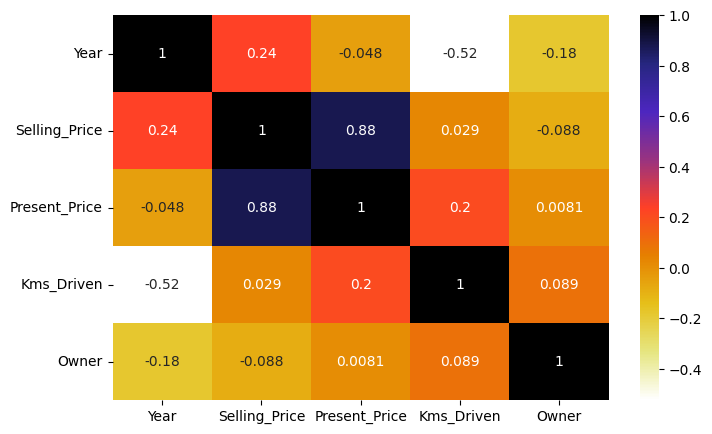

In [10]:
cor = df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

In [11]:
#we can see that most features have weak to none correlation(abs<0.5) ,except the correlation between Selling price and Present price which is estimated at 0.88
#indication that the indepedent feature Present_Price will probably be the variable 'explaining' most of the model's variance

#Data Preprocessing

In [12]:
df.isna().sum() #no missing vallues

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,301.000000
mean,-2.931579e-14,-3.540911e-17,-9.442428e-17,5.901518e-17,0.043189
std,1.001665e+00,1.001665e+00,1.001665e+00,1.001665e+00,0.247915
min,-3.681621e+00,-8.988906e-01,-8.468932e-01,-9.388230e-01,0.000000
25%,-5.639244e-01,-7.412353e-01,-7.449203e-01,-5.653257e-01,0.000000
50%,1.288970e-01,-2.091486e-01,-1.423532e-01,-1.274323e-01,0.000000
75%,8.217184e-01,2.638173e-01,2.632208e-01,3.044594e-01,0.000000
max,1.514540e+00,5.978822e+00,9.846355e+00,1.192752e+01,3.000000


In [14]:
X=df.drop(['Selling_Price'],axis=1)

In [15]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0.128897,-0.236215,-0.256224,Petrol,Dealer,Manual,0
1,-0.217514,0.221505,0.155911,Diesel,Dealer,Manual,0
2,1.168129,0.257427,-0.773969,Petrol,Dealer,Manual,0
3,-0.910335,-0.403079,-0.817758,Petrol,Dealer,Manual,0
4,0.128897,-0.087890,0.141743,Diesel,Dealer,Manual,0


In [16]:
X=X.values

In [17]:
df.Fuel_Type.unique()
df.Seller_Type.unique()
df.Transmission.unique()
df.Owner.unique()

array([0, 1, 3])

In [18]:
y=df['Selling_Price'].values

In [19]:
y=np.array(y).reshape(-1, 1)

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [21]:
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(drop='first'),[3,4,5,6])],remainder='passthrough')
#we could let the 7th feature(IDed as 6th column and named Owner) as it is since there could be a uniform scaling among its  values(it was done and no impact was noticed)

In [22]:
X=np.array(ct.fit_transform(X))

In [23]:
print(X)

[[0.0 1.0 0.0 ... 0.12889700346071423 -0.2362146144825814
  -0.2562244610375879]
 [1.0 0.0 0.0 ... -0.217513693340034 0.22150461673268804
  0.1559105027720208]
 [0.0 1.0 0.0 ... 1.168129093862959 0.257426885511608 -0.7739690093234088]
 ...
 [0.0 1.0 0.0 ... -1.603156480543027 0.3906869148527624
  1.3133400317608306]
 [1.0 0.0 0.0 ... 1.168129093862959 0.5645043444281812
  -0.7198762953233977]
 [0.0 1.0 0.0 ... 0.8217183970622106 -0.20029234570366145
  -0.8109581223253212]]


In [24]:
X.shape

(301, 9)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42, shuffle=True)


In [26]:
#Feature Scaling after the split since we don t want to pass information from the test dataset into our scaler.fit

In [27]:
from sklearn.preprocessing import StandardScaler
scaler_X=StandardScaler()
scaler_y=StandardScaler()
X_train[:,6:]=scaler_X.fit_transform(X_train[:,6:])
X_test[:,6:]=scaler_X.transform(X_test[:,6:])

In [28]:
y_train=scaler_y.fit_transform(y_train)
y_test=scaler_y.transform(y_test)

In [29]:
y_train=np.array(y_train)
y_test=np.array(y_test)

#Linear Model

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedKFold, KFold
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred_train=lin_reg.predict(X_train)
y_pred_test=lin_reg.predict(X_test)

print(f"R-squared on Train Set: {r2_score(y_train,y_pred_train):.4f}")
print(f"Mean Squared Error on Test Set: {mean_squared_error(y_test, y_pred_test):.4f}")
print(f"R-squared on Test Set: {r2_score(y_test,y_pred_test):.4f}")

R-squared on Train Set: 0.8862
Mean Squared Error on Test Set: 0.1301
R-squared on Test Set: 0.8809


In [32]:
lin_reg.score(X_train, y_train)

0.8862393789819905

In [33]:
lin_reg.score(X_test, y_test)

0.8808753095516437

In [34]:
y_test.shape

(76, 1)

In [35]:
r2_score(y_train,y_pred_train) #(y_true,y_pred) sklearn r_2 score is not symmetrical

0.8862393789819905

In [36]:
r2_score(y_test,y_pred_test)

0.8808753095516437

In [37]:
lin_reg.coef_

array([[ 0.48235871,  0.14395847, -0.24197958, -0.33224558,  0.02279584,
        -1.23134818,  0.21050175,  0.75966034, -0.04054807]])

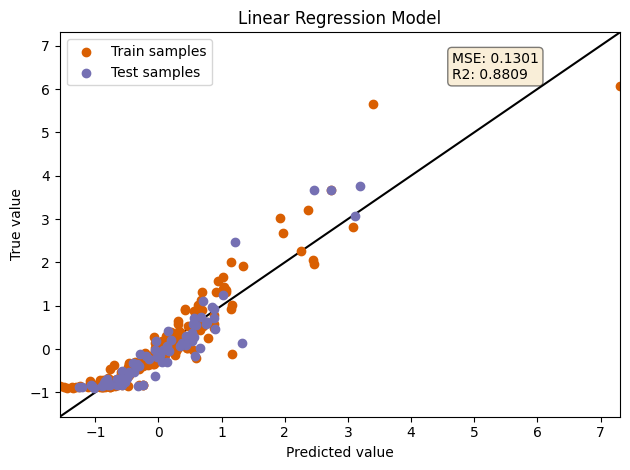

In [38]:
train_predictions=lin_reg.predict(X_train)
test_predictions=lin_reg.predict(X_test)
mse = mean_squared_error(y_test, test_predictions)
r2 = r2_score(y_test,test_predictions )
textstr = f'MSE: {mse:.4f}\nR2: {r2:.4f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

plt.scatter(train_predictions, y_train, label="Train samples", c="#d95f02")
plt.scatter(test_predictions, y_test, label="Test samples", c="#7570b3")
plt.title("Linear Regression Model")
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([min(train_predictions), max(train_predictions)], [min(train_predictions), max(train_predictions)], c="k", zorder=0)
plt.xlim([min(train_predictions), max(train_predictions)])
plt.ylim([min(train_predictions), max(train_predictions)])
plt.tight_layout()
plt.legend()

plt.text(0.70, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=props)
plt.show()

In [39]:
#Although the r^2 score of the model is quite satisfying(88%) we  notice a slight curve in the above plot.We should consider trying Polynomial Features Transformation and re evaluate the Linear Model in search of better metric scores

#Ridge Regression

In [41]:
from sklearn.linear_model import RidgeCV ,LassoCV ,ElasticNetCV
from numpy import arange

In [42]:
cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=42 ) #since we want to evaluate many different models and we want to do HPO as well we will set the number of k-fold iterations to 1

In [43]:
# define Ridge model
RidgeModel = RidgeCV(alphas=arange(0.01, 1000, 5), cv=cv) #10000 50
# fit model
RidgeModel.fit(X_train, y_train)
# summarize chosen configuration
print('Ridge best alpha (lambda): %f' % RidgeModel.alpha_)
RidgeModel.coef_


Ridge best alpha (lambda): 20.010000


array([[ 0.17789417, -0.14732801, -0.2226799 , -0.1825506 , -0.0034702 ,
        -0.04940813,  0.20842689,  0.70675471, -0.03156468]])

In [44]:
y_pred_train=RidgeModel.predict(X_train)
print('R^2 score Train:',  r2_score(y_train,y_pred_train))
print('MSE Train:',  mean_squared_error(y_test,y_pred_test))

y_pred_test=RidgeModel.predict(X_test)

print('R^2 score Test:',  r2_score(y_test,y_pred_test))
print('MSE Test:',  mean_squared_error(y_test,y_pred_test))

R^2 score Train: 0.8738522122963155
MSE Train: 0.13010590082405157
R^2 score Test: 0.8673444417843772
MSE Test: 0.1448840776500768


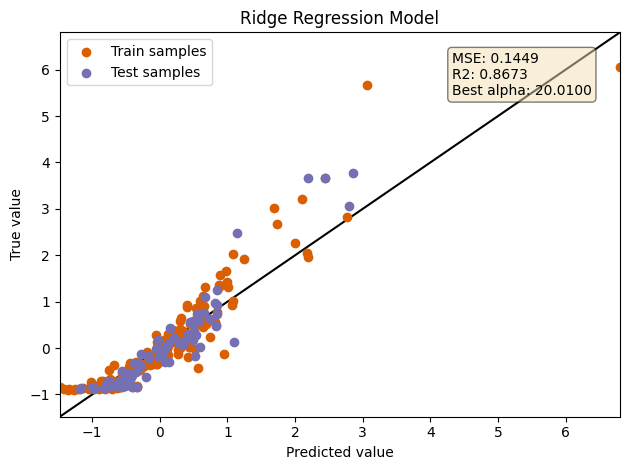

In [45]:
train_predictions=RidgeModel.predict(X_train)
test_predictions=RidgeModel.predict(X_test)
mse = mean_squared_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)
textstr = f'MSE: {mse:.4f}\nR2: {r2:.4f}\nBest alpha: {RidgeModel.alpha_:.4f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

plt.scatter(train_predictions, y_train, label="Train samples", c="#d95f02")
plt.scatter(test_predictions, y_test, label="Test samples", c="#7570b3")
plt.title("Ridge Regression Model")
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([min(train_predictions), max(train_predictions)], [min(train_predictions), max(train_predictions)], c="k", zorder=0)
plt.xlim([min(train_predictions), max(train_predictions)])
plt.ylim([min(train_predictions), max(train_predictions)])
plt.tight_layout()
plt.legend()

plt.text(0.70, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=props)
plt.show()

In [46]:
RidgeModel.coef_

array([[ 0.17789417, -0.14732801, -0.2226799 , -0.1825506 , -0.0034702 ,
        -0.04940813,  0.20842689,  0.70675471, -0.03156468]])

#Lasso

In [47]:
from sklearn.linear_model import LassoCV     #after a few searches on bigger spaces it was concluded that the best alpha is close to 0
# define Lasso model
LassoModel = LassoCV( alphas=arange(0.000001, 0.001, 0.000001), cv=cv, n_jobs=-1,max_iter =10000  )  # 1000 5
# n_jobs: Number of CPUs to use during the cross validation. "-1"" means using all processors


In [48]:
y_train=y_train.ravel()

In [49]:
LassoModel.fit(X_train, y_train )
# summarize chosen configuration
print('Lasso best alpha (lambda): %f' % LassoModel.alpha_)
LassoModel.coef_

Lasso best alpha (lambda): 0.001000


array([ 0.33756597,  0.        , -0.23856728, -0.31465362,  0.        ,
       -0.98604661,  0.21276407,  0.75916392, -0.04001125])

In [50]:
y_pred_train=LassoModel.predict(X_train)
y_pred_test=LassoModel.predict(X_test)

print('R^2 score Train:',  r2_score(y_train,y_pred_train))
print('MSE Train:',  mean_squared_error(y_train,y_pred_train))
print('R^2 score Test:',  r2_score(y_test,y_pred_test))
print('MSE Test:',  mean_squared_error(y_test,y_pred_test))


R^2 score Train: 0.8857722809831153
MSE Train: 0.11422771901688468
R^2 score Test: 0.8810231263630625
MSE Test: 0.1299444578911533


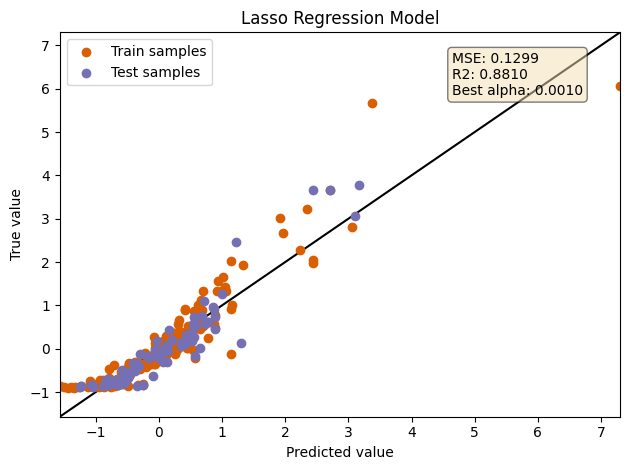

In [51]:
train_predictions=LassoModel.predict(X_train)
test_predictions=LassoModel.predict(X_test)
mse = mean_squared_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)
textstr = f'MSE: {mse:.4f}\nR2: {r2:.4f}\nBest alpha: {LassoModel.alpha_:.4f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

plt.scatter(train_predictions, y_train, label="Train samples", c="#d95f02")
plt.scatter(test_predictions, y_test, label="Test samples", c="#7570b3")
plt.title("Lasso Regression Model")
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([min(train_predictions), max(train_predictions)], [min(train_predictions), max(train_predictions)], c="k", zorder=0)
plt.xlim([min(train_predictions), max(train_predictions)])
plt.ylim([min(train_predictions), max(train_predictions)])
plt.tight_layout()
plt.legend()

plt.text(0.70, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=props)
plt.show()

#Elastic-Net

In [52]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
from sklearn.linear_model import ElasticNetCV
# Define Elastic net model
ratios = arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0, 1000.0]
ElasticNetModel = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)
# fit model
ElasticNetModel.fit(X_train, y_train)
# summarize chosen configuration
print('ElasticNet best alpha (lambda): %f' % ElasticNetModel.alpha_)
print('ElasticNet best l1_ratio (alpha): %f' % ElasticNetModel.l1_ratio_)

ElasticNet best alpha (lambda): 0.100000
ElasticNet best l1_ratio (alpha): 0.000000


In [54]:
y_pred_train=ElasticNetModel.predict(X_train)
y_pred_test=ElasticNetModel.predict(X_test)

print('R^2 score Train:',  r2_score(y_train,y_pred_train))
print('MSE Train:',  mean_squared_error(y_test,y_pred_test))
print('R^2 score Test:',  r2_score(y_test,y_pred_test))
print('MSE Test:',  mean_squared_error(y_test,y_pred_test))

R^2 score Train: 0.8725109928019402
MSE Train: 0.14747999962981945
R^2 score Test: 0.8649676210536779
MSE Test: 0.14747999962981945


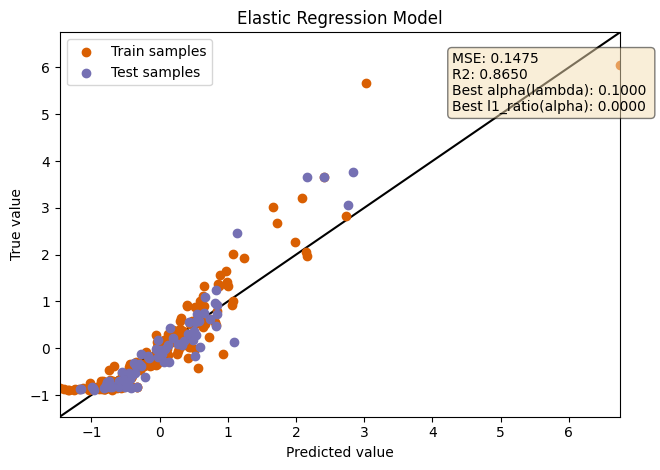

In [55]:
train_predictions=ElasticNetModel.predict(X_train)
test_predictions=ElasticNetModel.predict(X_test)
mse = mean_squared_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)
textstr = f'MSE: {mse:.4f}\nR2: {r2:.4f}\nBest alpha(lambda): {ElasticNetModel.alpha_:.4f} \nBest l1_ratio(alpha): {ElasticNetModel.l1_ratio_:.4f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

plt.scatter(train_predictions, y_train, label="Train samples", c="#d95f02")
plt.scatter(test_predictions, y_test, label="Test samples", c="#7570b3")
plt.title("Elastic Regression Model")
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([min(train_predictions), max(train_predictions)], [min(train_predictions), max(train_predictions)], c="k", zorder=0)
plt.xlim([min(train_predictions), max(train_predictions)])
plt.ylim([min(train_predictions), max(train_predictions)])
plt.tight_layout()
plt.legend()

plt.text(0.70, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=props)
plt.show()

In [83]:
ElasticNetModel.coef_

array([ 0.17498238, -0.14762898, -0.21990392, -0.17519764, -0.00428543,
       -0.04385195,  0.20671887,  0.70098707, -0.03047107])

#ARD Regression

In [56]:
from sklearn.linear_model import ARDRegression
ARD_Model=ARDRegression()

In [57]:
ARD_Model.fit(X_train,y_train)

ARDRegression()

In [58]:
y_pred_test=ARD_Model.predict(X_test)

In [59]:
r2_score(y_test,y_pred_test)

0.8801032133177155

In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ARDRegression
from sklearn.metrics import mean_squared_error


In [61]:
ard_reg = ARDRegression()

# Define a range of alpha_1 and alpha_2 values to tune the model
param_grid = {
    'alpha_1': [1e-6, 1e-5, 1e-4],
    'alpha_2': [1e-6, 1e-5, 1e-4],
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(ard_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha_1 = grid_search.best_params_['alpha_1']
best_alpha_2 = grid_search.best_params_['alpha_2']

# Train the ARD regression model with the best hyperparameters
best_ard_reg = ARDRegression(alpha_1=best_alpha_1, alpha_2=best_alpha_2)
best_ard_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_ard_reg.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error on Test Set: {mse}')
print(f'R^2 on Test Set: {r2}')

print('Best Hyperparameters:', grid_search.best_params_)
print('GridSearchCV Results:', grid_search.cv_results_)

Mean Squared Error on Test Set: 0.13094916998976808
R^2 on Test Set: 0.8801032140686996
Best Hyperparameters: {'alpha_1': 0.0001, 'alpha_2': 1e-06}
GridSearchCV Results: {'mean_fit_time': array([0.00600138, 0.00663657, 0.0046999 , 0.00441079, 0.0043057 ,
       0.00562248, 0.00426359, 0.004884  , 0.00439215]), 'std_fit_time': array([0.00236743, 0.00401686, 0.00092195, 0.00076482, 0.00084401,
       0.00185183, 0.00079553, 0.00085833, 0.0009603 ]), 'mean_score_time': array([0.00067687, 0.00064921, 0.00062265, 0.0006084 , 0.00061164,
       0.00085688, 0.00059004, 0.00065174, 0.00060816]), 'std_score_time': array([3.43511450e-05, 4.70580539e-05, 1.47801060e-05, 4.56209824e-05,
       3.72136501e-05, 4.76827812e-04, 1.97426708e-05, 4.21526745e-05,
       1.96774929e-05]), 'param_alpha_1': masked_array(data=[1e-06, 1e-06, 1e-06, 1e-05, 1e-05, 1e-05, 0.0001,
                   0.0001, 0.0001],
             mask=[False, False, False, False, False, False, False, False,
                   Fals

#Column Tranformation to achieve better results

In [62]:
from sklearn.preprocessing import PolynomialFeatures
X_poly=X


In [63]:
X[1,]

array([1.0, 0.0, 0.0, 1.0, 0.0, 0.0, -0.217513693340034,
       0.22150461673268804, 0.1559105027720208], dtype=object)

In [64]:
X.shape

(301, 9)

In [65]:
poly_reg=PolynomialFeatures(degree=3) #tried with degree=2 and degree=3 and 3 had better results
temp_X=X[:,6:]
numeric_poly=poly_reg.fit_transform(temp_X) #
X_poly=np. concatenate((X[:,:6],numeric_poly),axis=1)

In [66]:
X_poly

array([[0.0, 1.0, 0.0, ..., -0.014296644418109813, -0.015507719616333683,
        -0.016821385540944724],
       [1.0, 0.0, 0.0, ..., 0.007649638938071435, 0.005384353023659307,
        0.0037898857342276286],
       [0.0, 1.0, 0.0, ..., -0.05128984376258219, 0.15420591942595735,
        -0.46362912891836167],
       ...,
       [0.0, 1.0, 0.0, ..., 0.20046331769710693, 0.6738810285735332,
        2.2653303651168533],
       [1.0, 0.0, 0.0, ..., -0.22939949114244063, 0.2925385029586827,
        -0.3730556475392046],
       [0.0, 1.0, 0.0, ..., -0.03253322625153267, -0.1317228772843988,
        -0.5333291037885728]], dtype=object)

In [67]:
X_poly.shape

(301, 26)

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X_poly,y,test_size=0.25,random_state=42, shuffle=True)

#Polynomial Linear Regression with degree=3

In [69]:
lin_reg3=LinearRegression()
lin_reg3.fit(X_train,y_train)

LinearRegression()

In [70]:
y_pred_train=lin_reg3.predict(X_train)
y_pred_test=lin_reg3.predict(X_test)

print(f"R-squared on Train Set: {r2_score(y_train,y_pred_train):.4f}")
print(f"Mean Squared Error on Test Set: {mean_squared_error(y_test, y_pred_test):.4f}")
print(f"R-squared on Test Set: {r2_score(y_test,y_pred_test):.4f}")

R-squared on Train Set: 0.9819
Mean Squared Error on Test Set: 0.0245
R-squared on Test Set: 0.9770


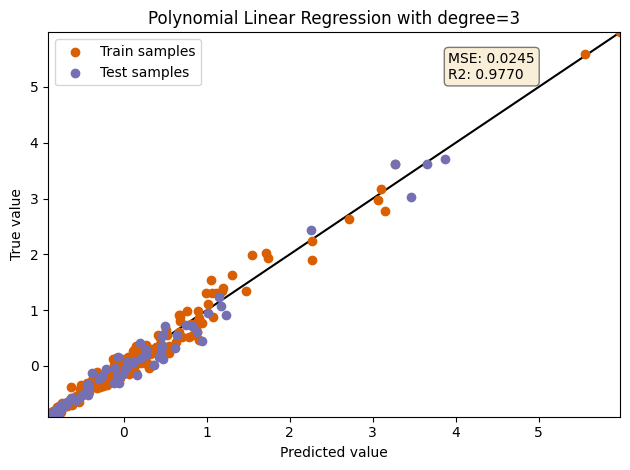

In [71]:
train_predictions=lin_reg3.predict(X_train)
test_predictions=lin_reg3.predict(X_test)
mse = mean_squared_error(y_test, test_predictions)
r2 = r2_score(y_test,test_predictions )
textstr = f'MSE: {mse:.4f}\nR2: {r2:.4f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

plt.scatter(train_predictions, y_train, label="Train samples", c="#d95f02")
plt.scatter(test_predictions, y_test, label="Test samples", c="#7570b3")
plt.title("Polynomial Linear Regression with degree=3")
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([min(train_predictions), max(train_predictions)], [min(train_predictions), max(train_predictions)], c="k", zorder=0)
plt.xlim([min(train_predictions), max(train_predictions)])
plt.ylim([min(train_predictions), max(train_predictions)])
plt.tight_layout()
plt.legend()

plt.text(0.70, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=props)
plt.show()

#Ridge Polynomial Linear Regression with degree=3

In [72]:
from sklearn.preprocessing import PolynomialFeatures
X_poly=X

In [73]:
Ridge_poly= RidgeCV(alphas=arange(0.01, 1000, 5), cv=cv)
Ridge_poly.fit(X_train,y_train)

RidgeCV(alphas=array([1.0000e-02, 5.0100e+00, 1.0010e+01, 1.5010e+01, 2.0010e+01,
       2.5010e+01, 3.0010e+01, 3.5010e+01, 4.0010e+01, 4.5010e+01,
       5.0010e+01, 5.5010e+01, 6.0010e+01, 6.5010e+01, 7.0010e+01,
       7.5010e+01, 8.0010e+01, 8.5010e+01, 9.0010e+01, 9.5010e+01,
       1.0001e+02, 1.0501e+02, 1.1001e+02, 1.1501e+02, 1.2001e+02,
       1.2501e+02, 1.3001e+02, 1.3501e+02, 1.4001e+02, 1.4501e+0...
       8.5001e+02, 8.5501e+02, 8.6001e+02, 8.6501e+02, 8.7001e+02,
       8.7501e+02, 8.8001e+02, 8.8501e+02, 8.9001e+02, 8.9501e+02,
       9.0001e+02, 9.0501e+02, 9.1001e+02, 9.1501e+02, 9.2001e+02,
       9.2501e+02, 9.3001e+02, 9.3501e+02, 9.4001e+02, 9.4501e+02,
       9.5001e+02, 9.5501e+02, 9.6001e+02, 9.6501e+02, 9.7001e+02,
       9.7501e+02, 9.8001e+02, 9.8501e+02, 9.9001e+02, 9.9501e+02]),
        cv=RepeatedKFold(n_repeats=1, n_splits=10, random_state=42))

In [74]:
y_pred_train=Ridge_poly.predict(X_train)
print('R^2 score Train:',  r2_score(y_train,y_pred_train))
print('MSE Train:',  mean_squared_error(y_test,y_pred_test))

y_pred_test=Ridge_poly.predict(X_test)

print('R^2 score Test:',  r2_score(y_test,y_pred_test))
print('MSE Test:',  mean_squared_error(y_test,y_pred_test))

R^2 score Train: 0.9795391103758507
MSE Train: 0.024512827514432678
R^2 score Test: 0.9793056354358383
MSE Test: 0.022080861425646126


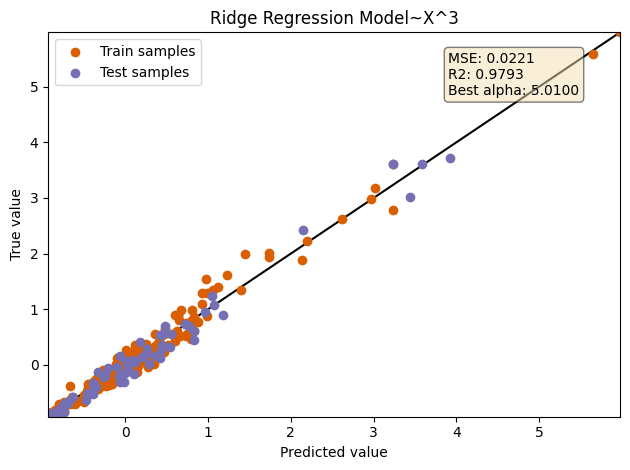

In [75]:
train_predictions=Ridge_poly.predict(X_train)
test_predictions=Ridge_poly.predict(X_test)
mse = mean_squared_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)
textstr = f'MSE: {mse:.4f}\nR2: {r2:.4f}\nBest alpha: {Ridge_poly.alpha_:.4f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

plt.scatter(train_predictions, y_train, label="Train samples", c="#d95f02")
plt.scatter(test_predictions, y_test, label="Test samples", c="#7570b3")
plt.title("Ridge Regression Model~X^3")
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([min(train_predictions), max(train_predictions)], [min(train_predictions), max(train_predictions)], c="k", zorder=0)
plt.xlim([min(train_predictions), max(train_predictions)])
plt.ylim([min(train_predictions), max(train_predictions)])
plt.tight_layout()
plt.legend()

plt.text(0.70, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=props)
plt.show()

#Lasso Polynomial Linear Regression with degree=3

In [76]:
Lasso_poly=LassoCV( alphas=arange(0.1, 1, 0.1), cv=cv, n_jobs=-1,max_iter =10000  )
Lasso_poly.fit(X_train,y_train)

LassoCV(alphas=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
        cv=RepeatedKFold(n_repeats=1, n_splits=10, random_state=42),
        max_iter=10000, n_jobs=-1)

In [77]:
y_pred_train=Lasso_poly.predict(X_train)
y_pred_test=Lasso_poly.predict(X_test)
print('R^2 score Train:',  r2_score(y_train,y_pred_train))
print('MSE Train:',  mean_squared_error(y_test,y_pred_test))



print('R^2 score Test:',  r2_score(y_test,y_pred_test))
print('MSE Test:',  mean_squared_error(y_test,y_pred_test))


R^2 score Train: 0.8993942826857707
MSE Train: 0.1211895470026462
R^2 score Test: 0.8864201618454297
MSE Test: 0.1211895470026462


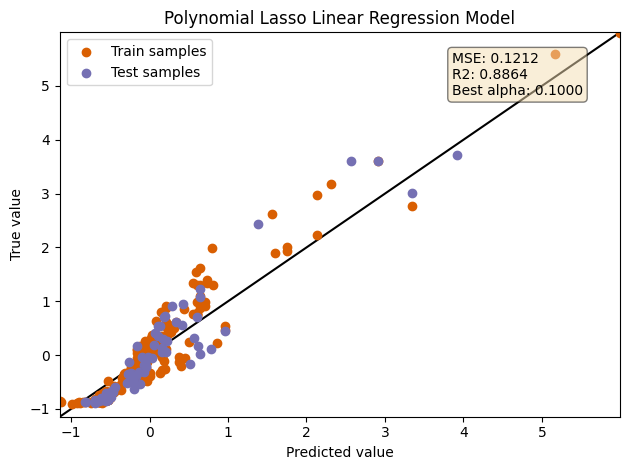

In [78]:
train_predictions=Lasso_poly.predict(X_train)
test_predictions=Lasso_poly.predict(X_test)
mse = mean_squared_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)
textstr = f'MSE: {mse:.4f}\nR2: {r2:.4f}\nBest alpha: {Lasso_poly.alpha_:.4f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

plt.scatter(train_predictions, y_train, label="Train samples", c="#d95f02")
plt.scatter(test_predictions, y_test, label="Test samples", c="#7570b3")
plt.title("Polynomial Lasso Linear Regression Model")
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([min(train_predictions), max(train_predictions)], [min(train_predictions), max(train_predictions)], c="k", zorder=0)
plt.xlim([min(train_predictions), max(train_predictions)])
plt.ylim([min(train_predictions), max(train_predictions)])
plt.tight_layout()
plt.legend()

plt.text(0.70, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=props)
plt.show()

#Elastic Net Polynomial Linear Regression with degree=3

In [79]:
from sklearn.linear_model import ElasticNetCV
# Define Elastic net model
ratios = arange(0, 1, 0.1)    # only a few values tp valuate for alpha to reduce calculation time
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0, 1000.0]
ElasticNet_poly = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)
# fit model
ElasticNet_poly.fit(X_train, y_train)
# summarize chosen configuration
print('ElasticNet best alpha (lambda): %f' % ElasticNet_poly.alpha_)
print('ElasticNet best l1_ratio (alpha): %f' % ElasticNet_poly.l1_ratio_)

ElasticNet best alpha (lambda): 0.010000
ElasticNet best l1_ratio (alpha): 0.000000


In [80]:
y_pred_train=ElasticNet_poly.predict(X_train)
y_pred_test=ElasticNet_poly.predict(X_test)

print('R^2 score Train:',  r2_score(y_train,y_pred_train))
print('MSE Train:',  mean_squared_error(y_test,y_pred_test))
print('R^2 score Test:',  r2_score(y_test,y_pred_test))
print('MSE Test:',  mean_squared_error(y_test,y_pred_test))

R^2 score Train: 0.981097993215059
MSE Train: 0.022305099131515106
R^2 score Test: 0.9790954780173919
MSE Test: 0.022305099131515106


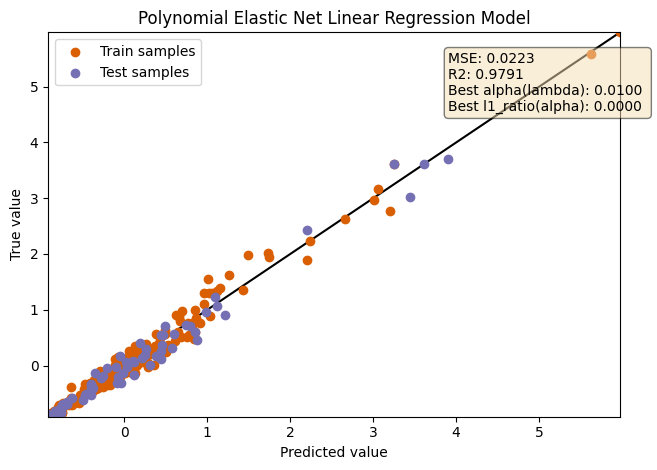

In [81]:
train_predictions=ElasticNet_poly.predict(X_train)
test_predictions=ElasticNet_poly.predict(X_test)
mse = mean_squared_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)
textstr = f'MSE: {mse:.4f}\nR2: {r2:.4f}\nBest alpha(lambda): {ElasticNet_poly.alpha_:.4f} \nBest l1_ratio(alpha): {ElasticNet_poly.l1_ratio_:.4f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

plt.scatter(train_predictions, y_train, label="Train samples", c="#d95f02")
plt.scatter(test_predictions, y_test, label="Test samples", c="#7570b3")
plt.title("Polynomial Elastic Net Linear Regression Model")
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([min(train_predictions), max(train_predictions)], [min(train_predictions), max(train_predictions)], c="k", zorder=0)
plt.xlim([min(train_predictions), max(train_predictions)])
plt.ylim([min(train_predictions), max(train_predictions)])
plt.tight_layout()
plt.legend()

plt.text(0.70, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=props)
plt.show()

In [82]:
X_poly.shape

(301, 9)